In [0]:
#Importing various Libraries
%tensorflow_version 1.x
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
%matplotlib inline
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

In [35]:
#Import dataset by using pandas dataframe and then printing first 10 rows of it
df =  pd.read_csv('https://storage.googleapis.com/tensorflow-workshop-examples/stack-overflow-data.csv')
df = df[pd.notnull(df['tags'])]
print(df.head(10))
print(df['post'].apply(lambda x: len(x.split(' '))).sum())

                                                post           tags
0  what is causing this behavior  in our c# datet...             c#
1  have dynamic html load as if it was in an ifra...        asp.net
2  how to convert a float value in to min:sec  i ...    objective-c
3  .net framework 4 redistributable  just wonderi...           .net
4  trying to calculate and print the mean and its...         python
5  how to give alias name for my website  i have ...        asp.net
6  window.open() returns null in angularjs  it wo...      angularjs
7  identifying server timeout quickly in iphone  ...         iphone
8  unknown method key  error in rails 2.3.8 unit ...  ruby-on-rails
9  from the include  how to show and hide the con...      angularjs
10286120


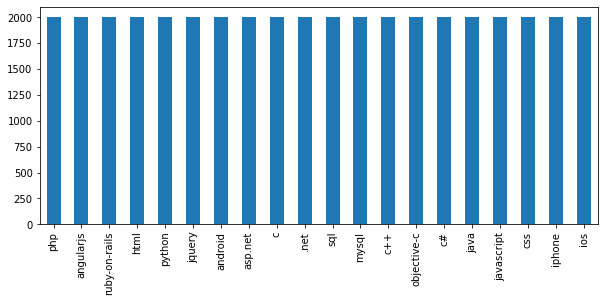

In [36]:
#Plotting the Classes(X-axis) and their no. of occurences(y-axis) in the dataset
my_tags = ['java','html','asp.net','c#','ruby-on-rails','jquery','mysql','php','ios','javascript','python','c','css','android','iphone','sql','objective-c','c++','angularjs','.net']
plt.figure(figsize=(10,4))
df.tags.value_counts().plot(kind='bar');

In [37]:
#Printing the question(posts)-tags pairs
def print_plot(index):
    example = df[df.index == index][['post', 'tags']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Tag:', example[1])

print_plot(30)

how to chain expressions inside ngclass when using the {...}[] form  how can i add another expression to an <code>ng-class</code> directive that uses this form:   <pre><code>ng-class= {true: loading   false: loading-done }[data.loader===null]  </code></pre>   i d like to add something like this to the list:   <pre><code>{highlight:isspecial} </code></pre>   is it possible without expanding the first expression     thanks.
Tag: angularjs


In [38]:
#text pre-processing
nltk.download('stopwords')
STOPWORDS = nltk.corpus.stopwords.words('english')
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')

def clean_text(text):
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text
    
df['post'] = df['post'].apply(clean_text)
print_plot(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
need interface c# possible duplicate would want use interfaces need interface want know use example interface idemo function prototype public void show first class using interface class myclass1 idemo public void show function body comes responsewrite myclass second class using interface class myclass2 idemo public void show function body comes responsewrite myclass2 responsewrite two classes function name different body even achieved without interface need interface use
Tag: c#


In [39]:
#Ccounting number of words in our dataset after cleaning
df['post'].apply(lambda x: len(x.split(' '))).sum()

3424297

In [0]:
#splitting the dataset into training and testing
X = df.post
y = df.tags
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 2003)

In [0]:
#Defining functions for evaluation metrics
def recall_m(y_true, y_pred):
  true_positives= K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
  possible_positives= K.sum(K.round(K.clip(y_true, 0, 1)))
  recall= true_positives / (possible_positives + K.epsilon())
  return recall

def precision_m(y_true, y_pred):
  true_positives= K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
  predicted_positives= K.sum(K.round(K.clip(y_true, 0, 1)))
  precision= true_positives / (predicted_positives + K.epsilon())
  return precision

def f1_m(y_true, y_pred):
  precision= precision_m(y_true, y_pred)
  recall= recall_m(y_true, y_pred)
  return 2*((precision*recall)/(precision+recall+K.epsilon()))

Naiive Bayes Classifier

In [42]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.7455
               precision    recall  f1-score   support

         java       0.58      0.64      0.61       597
         html       0.90      0.87      0.89       572
      asp.net       0.92      0.91      0.91       626
           c#       0.74      0.72      0.73       624
ruby-on-rails       0.71      0.87      0.78       589
       jquery       0.76      0.48      0.59       618
        mysql       0.78      0.73      0.75       608
          php       0.72      0.88      0.79       601
          ios       0.59      0.69      0.64       576
   javascript       0.64      0.63      0.64       618
       python       0.64      0.60      0.62       575
            c       0.78      0.79      0.79       595
          css       0.83      0.60      0.70       604
      android       0.72      0.81      0.76       585
       iphone       0.65      0.82      0.73       604
          sql       0.69      0.62      0.66       596
  objective-c       0.83      0.77      0.80    

Linear Support Vector Machines

In [43]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.7815
               precision    recall  f1-score   support

         java       0.73      0.68      0.70       597
         html       0.83      0.93      0.88       572
      asp.net       0.90      0.95      0.93       626
           c#       0.79      0.77      0.78       624
ruby-on-rails       0.71      0.87      0.78       589
       jquery       0.78      0.34      0.48       618
        mysql       0.83      0.67      0.74       608
          php       0.73      0.93      0.82       601
          ios       0.77      0.56      0.65       576
   javascript       0.74      0.57      0.64       618
       python       0.70      0.66      0.68       575
            c       0.78      0.85      0.81       595
          css       0.77      0.78      0.78       604
      android       0.81      0.87      0.84       585
       iphone       0.81      0.81      0.81       604
          sql       0.69      0.69      0.69       596
  objective-c       0.80      0.89      0.84    

Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)


y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


accuracy 0.7839166666666667
               precision    recall  f1-score   support

         java       0.66      0.64      0.65       597
         html       0.94      0.88      0.91       572
      asp.net       0.98      0.94      0.96       626
           c#       0.76      0.75      0.75       624
ruby-on-rails       0.81      0.82      0.82       589
       jquery       0.59      0.59      0.59       618
        mysql       0.77      0.78      0.78       608
          php       0.77      0.86      0.81       601
          ios       0.67      0.69      0.68       576
   javascript       0.65      0.62      0.63       618
       python       0.61      0.66      0.63       575
            c       0.83      0.83      0.83       595
          css       0.81      0.78      0.80       604
      android       0.86      0.86      0.86       585
       iphone       0.83      0.80      0.82       604
          sql       0.68      0.61      0.64       596
  objective-c       0.83      0.83  

Word2vec and Logistic Regression

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [47]:
import gensim
wv = gensim.models.KeyedVectors.load_word2vec_format("/content/drive/My Drive/Lakehead/GoogleNews-vectors-negative300.bin.gz", binary=True)
wv.init_sims(replace=True)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [48]:
from itertools import islice
list(islice(wv.vocab, 13030, 13050))

['Memorial_Hospital',
 'Seniors',
 'memorandum',
 'elephant',
 'Trump',
 'Census',
 'pilgrims',
 'De',
 'Dogs',
 '###-####_ext',
 'chaotic',
 'forgive',
 'scholar',
 'Lottery',
 'decreasing',
 'Supervisor',
 'fundamentally',
 'Fitness',
 'abundance',
 'Hold']

In [0]:
def word_averaging(wv, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.vocab:
            mean.append(wv.syn0norm[wv.vocab[word].index])
            all_words.add(wv.vocab[word].index)

    if not mean:
        logging.warning("cannot compute similarity with no input %s", words)
        # FIXME: remove these examples in pre-processing
        return np.zeros(wv.vector_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def  word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, post) for post in text_list ])

In [50]:
nltk.download('punkt')
def w2v_tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(sent, language='english'):
            if len(word) < 2:
                continue
            tokens.append(word)
    return tokens
    
train, test = train_test_split(df, test_size=0.3, random_state = 42)

test_tokenized = test.apply(lambda r: w2v_tokenize_text(r['post']), axis=1).values
train_tokenized = train.apply(lambda r: w2v_tokenize_text(r['post']), axis=1).values

X_train_word_average = word_averaging_list(wv,train_tokenized)
X_test_word_average = word_averaging_list(wv,test_tokenized)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.wv.vectors_norm instead).
  
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg = logreg.fit(X_train_word_average, train['tags'])
y_pred = logreg.predict(X_test_word_average)
print('accuracy %s' % accuracy_score(y_pred, test.tags))
print(classification_report(test.tags, y_pred,target_names=my_tags))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


accuracy 0.6325
               precision    recall  f1-score   support

         java       0.60      0.57      0.59       613
         html       0.76      0.75      0.75       620
      asp.net       0.64      0.65      0.65       587
           c#       0.53      0.52      0.52       586
ruby-on-rails       0.70      0.73      0.72       599
       jquery       0.42      0.38      0.40       589
        mysql       0.62      0.62      0.62       594
          php       0.72      0.79      0.76       610
          ios       0.57      0.62      0.59       617
   javascript       0.54      0.54      0.54       587
       python       0.59      0.50      0.54       611
            c       0.61      0.61      0.61       594
          css       0.63      0.60      0.62       619
      android       0.59      0.57      0.58       574
       iphone       0.69      0.74      0.72       584
          sql       0.40      0.43      0.41       578
  objective-c       0.67      0.70      0.69    

Doc2vec and Logistic Regression

In [0]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
import gensim
from gensim.models.doc2vec import TaggedDocument
import re

def label_sentences(corpus, label_type):
    """
    Gensim's Doc2Vec implementation requires each document/paragraph to have a label associated with it.
    We do this by using the TaggedDocument method. The format will be "TRAIN_i" or "TEST_i" where "i" is
    a dummy index of the post.
    """
    labeled = []
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(gensim.models.doc2vec.TaggedDocument(v.split(), [label]))
    return labeled
X_train, X_test, y_train, y_test = train_test_split(df.post, df.tags, random_state=0, test_size=0.3)
X_train = label_sentences(X_train, 'Train')
X_test = label_sentences(X_test, 'Test')
all_data = X_train + X_test

In [53]:
all_data[:2]

[TaggedDocument(words=['fulltext', 'search', 'php', 'pdo', 'returning', 'result', 'searched', 'lot', 'matter', 'find', 'wrong', 'setup', 'trying', 'fulltext', 'search', 'using', 'pdo', 'php', 'get', 'results', 'error', 'messages', 'table', 'contains', 'customer', 'details', 'id', 'int', '11', 'auto_increment', 'name', 'varchar', '150', 'lastname', 'varchar', '150', 'company', 'varchar', '250', 'adress', 'varchar', '150', 'postcode', 'int', '5', 'city', 'varchar', '150', 'email', 'varchar', '250', 'phone', 'varchar', '20', 'orgnr', 'varchar', '15', 'timestamp', 'timestamp', 'current_timestamp', 'run', 'sqlquery', 'alter', 'table', 'system_customer', 'add', 'fulltext', 'name', 'lastname', 'except', 'columns', 'id', 'postcode', 'timestamp', 'signs', 'trouble', 'far', 'idea', 'problem', 'lies', 'db', 'configuration', 'php', 'code', 'goes', 'php', 'sth', 'dbhprepare', 'select', 'name', 'lastname', 'company', 'adress', 'city', 'phone', 'email', 'orgnr', 'db_pre', 'customer', 'match', 'name',

In [54]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, min_count=1, alpha=0.065, min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm(all_data)])

for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 40000/40000 [00:00<00:00, 2824447.14it/s]


In [0]:
def get_vectors(model, corpus_size, vectors_size, vectors_type):
    """
    Get vectors from trained doc2vec model
    :param doc2vec_model: Trained Doc2Vec model
    :param corpus_size: Size of the data
    :param vectors_size: Size of the embedding vectors
    :param vectors_type: Training or Testing vectors
    :return: list of vectors
    """
    vectors = np.zeros((corpus_size, vectors_size))
    for i in range(0, corpus_size):
        prefix = vectors_type + '_' + str(i)
        vectors[i] = model.docvecs[prefix]
    return vectors
    
train_vectors_dbow = get_vectors(model_dbow, len(X_train), 300, 'Train')
test_vectors_dbow = get_vectors(model_dbow, len(X_test), 300, 'Test')

In [56]:
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(train_vectors_dbow, y_train)
logreg = logreg.fit(train_vectors_dbow, y_train)
y_pred = logreg.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


accuracy 0.7985833333333333
               precision    recall  f1-score   support

         java       0.68      0.66      0.67       589
         html       0.88      0.90      0.89       661
      asp.net       0.95      0.94      0.95       606
           c#       0.80      0.77      0.78       613
ruby-on-rails       0.84      0.88      0.86       601
       jquery       0.70      0.69      0.70       585
        mysql       0.87      0.80      0.83       621
          php       0.81      0.82      0.82       587
          ios       0.65      0.67      0.66       560
   javascript       0.67      0.67      0.67       611
       python       0.66      0.66      0.66       593
            c       0.80      0.84      0.82       581
          css       0.79      0.77      0.78       608
      android       0.86      0.84      0.85       593
       iphone       0.81      0.82      0.81       592
          sql       0.69      0.65      0.67       597
  objective-c       0.86      0.86  

BOW with Keras

In [25]:
import itertools
import os
%tensorflow_version 1.x
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
%tensorflow_version 1.x
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix
%tensorflow_version 1.x
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils
%tensorflow_version 1.x
train_size = int(len(df) * .7)
train_posts = df['post'][:train_size]
train_tags = df['tags'][:train_size]

test_posts = df['post'][train_size:]
test_tags = df['tags'][train_size:]

max_words = 1000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)
tokenize.fit_on_texts(train_posts) # only fit on train

x_train = tokenize.texts_to_matrix(train_posts)
x_test = tokenize.texts_to_matrix(test_posts)

encoder = LabelEncoder()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

batch_size = 32
epochs = 20

# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy',f1_m,precision_m,recall_m])
model.summary()              
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               512512    
_________________________________________________________________
activation_12 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 20)                10260     
_________________________________________________________________
activation_13 (Activation)   (None, 20)                0         
Total params: 522,772
Trainable params: 522,772
Non-trainable params: 0
_________________________________________________________________
Train on 25200 samples, validate on 2800 samples
Epoch 1/20
25200/25200 [==============================] - 7s 262u

In [26]:
loss, accuracy, f1_score, precision, recall= model.evaluate(x_test, y_test, batch_size=batch_size, verbose=0)
print(f'Test loss:{loss}, accuracy:{accuracy}, F-1 score:{f1_score}, Precision:{precision}, recall:{recall}')

Test loss:1.1811138429641723, accuracy:0.77875, F-1 score:0.7709166070620219, Precision:0.7709166666666667, recall:0.7709166666666667


CNN

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D
from keras import backend as K
import matplotlib.pyplot as plt
import numpy
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3,
                 activation='relu',
                 input_shape=(1000,1)))
model.add(Conv1D(128, kernel_size=5, activation='relu'))
model.add(Conv1D(128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Dropout(rate = 0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy',f1_m,precision_m,recall_m])

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [20]:
print(x_train.shape)
print(y_train.shape)
model.summary()

(28000, 1000, 1)
(28000, 20)
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 998, 64)           256       
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 994, 128)          41088     
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 990, 128)          82048     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 990, 128)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 990, 128)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 126720)            0         
_________________________________________________________________
dense_9 (Dense)          

In [21]:
history = model.fit(x_train, y_train,
          batch_size=32,validation_split=0.1,epochs=3)

ERROR! Session/line number was not unique in database. History logging moved to new session 66
Train on 25200 samples, validate on 2800 samples
Epoch 1/3
25200/25200 [==============================] - 15s 591us/step - loss: 1.2300 - acc: 0.6408 - f1_m: 0.5100 - precision_m: 0.5100 - recall_m: 0.5100 - val_loss: 0.7103 - val_acc: 0.7750 - val_f1_m: 0.6968 - val_precision_m: 0.6968 - val_recall_m: 0.6968
Epoch 2/3
25200/25200 [==============================] - 12s 468us/step - loss: 0.8047 - acc: 0.7510 - f1_m: 0.6660 - precision_m: 0.6660 - recall_m: 0.6660 - val_loss: 0.6719 - val_acc: 0.7950 - val_f1_m: 0.7193 - val_precision_m: 0.7193 - val_recall_m: 0.7193
Epoch 3/3
25200/25200 [==============================] - 12s 471us/step - loss: 0.6945 - acc: 0.7779 - f1_m: 0.7059 - precision_m: 0.7059 - recall_m: 0.7059 - val_loss: 0.6785 - val_acc: 0.7950 - val_f1_m: 0.7125 - val_precision_m: 0.7125 - val_recall_m: 0.7125


In [0]:
import keras 
model.save('cnn.h5')
model = keras.models.load_model('cnn.h5', 
                   custom_objects = {'f1_m': f1_m,  'precision_m': precision_m, 'recall_m' : recall_m})

In [23]:
loss, accuracy, f1_score, precision, recall= model.evaluate(x_test, y_test, batch_size=batch_size, verbose=0)
print(f'Test loss:{loss}, accuracy:{accuracy}, F-1 score:{f1_score}, Precision:{precision}, recall:{recall}')

Test loss:0.6748847924868265, accuracy:0.7883333333333333, F-1 score:0.7067499403953552, Precision:0.70675, recall:0.70675


HYBRID CNN then LSTM

In [16]:
from keras import Sequential
from keras.layers import LSTM
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D
from keras import backend as K
import matplotlib.pyplot as plt
import numpy


model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3,
                 activation='relu',
                 input_shape=(1000,1)))
model.add(Conv1D(128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(LSTM(units=64, return_sequences=True, name='output'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=0.001),
              metrics=['accuracy',f1_m,precision_m,recall_m])

print(model.summary())
print(x_train.shape)
print(y_train.shape)
model.fit(x_train, y_train,batch_size=128, epochs=3, verbose=1)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 998, 64)           256       
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 994, 128)          41088     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 994, 128)          0         
_________________________________________________________________
output (LSTM)                (None, 994, 64)           49408     
_________________________________________________________________
flatten_5 (Flatten)          (None, 63616)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4071488   
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)               

In [0]:
import keras 
model.save('hybrid.h5')
model = keras.models.load_model('hybrid.h5', 
                   custom_objects = {'f1_m': f1_m,  'precision_m': precision_m, 'recall_m' : recall_m})

In [18]:
loss, accuracy, f1_score, precision, recall= model.evaluate(x_test, y_test, batch_size=batch_size, verbose=0)
print(f'Test loss:{loss}, accuracy:{accuracy}, F-1 score:{f1_score}, Precision:{precision}, recall:{recall}')

Test loss:0.6629065762758255, accuracy:0.7871666666666667, F-1 score:0.7289166070620219, Precision:0.7289166666666667, recall:0.7289166666666667


LSTM

In [12]:
from keras import Sequential
from keras.layers import LSTM
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D
from keras import backend as K
import matplotlib.pyplot as plt
import numpy


model = Sequential()
model.add(LSTM(units=128, input_shape = (1000,1), return_sequences = True))
model.add(LSTM(units=64, return_sequences=True, name='output'))
model.add(Flatten())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=0.001),
              metrics=['accuracy',f1_m,precision_m,recall_m])

print(model.summary())
print(x_train.shape)
print(y_train.shape)
model.fit(x_train, y_train,batch_size=128, epochs=3, verbose=1)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 1000, 128)         66560     
_________________________________________________________________
output (LSTM)                (None, 1000, 64)          49408     
_________________________________________________________________
flatten_3 (Flatten)          (None, 64000)             0         
_________________________________________________________________
activation_7 (Activation)    (None, 64000)             0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 64000)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 20)                1280020   
_________________________________________________________________
activation_8 (Activation)    (None, 20)               

In [0]:
import keras 
model.save('lstm.h5')
model = keras.models.load_model('lstm.h5', 
                   custom_objects = {'f1_m': f1_m,  'precision_m': precision_m, 'recall_m' : recall_m})

In [14]:
loss, accuracy, f1_score, precision, recall= model.evaluate(x_test, y_test, batch_size=batch_size, verbose=0)
print(f'Test loss:{loss}, accuracy:{accuracy}, F-1 score:{f1_score}, Precision:{precision}, recall:{recall}')

Test loss:0.8402288181781769, accuracy:0.746, F-1 score:0.6621666070620219, Precision:0.6621666666666667, recall:0.6621666666666667
